# Tutorial 7
## Outline

* Using Seaborn to visualize statistical data
    * Categorical data visualization: catplot
    * Continuous data visualization: relplot
    * Input feature correlation: pairplot
* Correlation matrix
* Hierarchical agglomerative clustering
* Comparing different unsupervised clustering methods on toy datasets
* Q&A on HW5
<br><br>

# Using Seaborn to visualize statistical data
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.<br>
You may need to run <br>
**conda install seaborn**
 <br>
 if you haven't installed seaborn before
[Documentation for Seaborn](http://seaborn.pydata.org/index.html)
![1](http://seaborn.pydata.org/_images/scatterplot_matrix.png)

### Categorical data visualization: catplot
seaborn.catplot()<br>
Frequently used arguments:<br>
x,y,data,row,col,hue,kind=[“point”, “bar”, “strip”, “swarm”, “box”, “violin”, “boxen”]

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib widget

df=pd.read_csv("../../Datasets/titantic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's process the data first by dropping unrelated features and filter out data with missing values.

In [2]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df = df.dropna(axis=0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


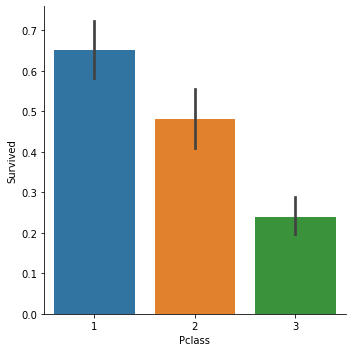

In [3]:
sns.catplot(data=df,x='Pclass',y='Survived',kind="bar")

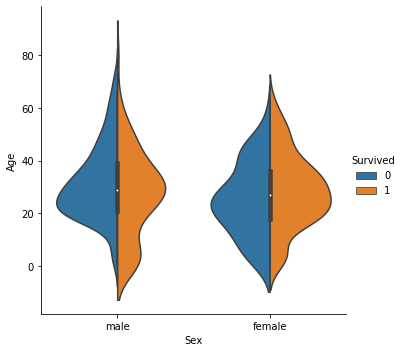

In [4]:
sns.catplot(data=df,x='Sex',y='Age',hue='Survived',kind="violin",split=True)

### Continuous data visualization: relplot
seaborn.relplot()<br>
Frequently used arguments:<br>
x,y,data,row,col,hue,size,style,markers,kind=["scatter","line"]

In [5]:
df2=pd.read_csv("../../Datasets/Admission_Predict_Ver1.1.csv")
df2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df2.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

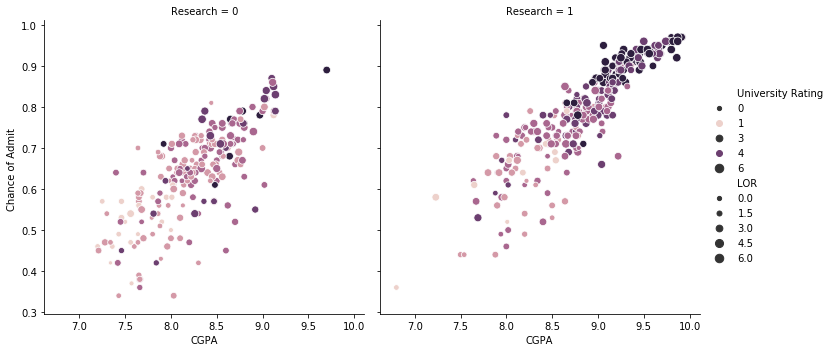

In [9]:
sns.relplot(data=df2,x='CGPA',y ='Chance of Admit ',col = 'Research', hue = 'University Rating',size = 'LOR ')

### Input feature Visualization: pairplot
seaborn.pairplot()<br>
Frequently used arguments:
data,hue,kind=["scatter","reg"],diag_kind=["auto","hist","kde"]

In [10]:
df3=pd.read_csv("../../Datasets/wines.csv")
df3.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


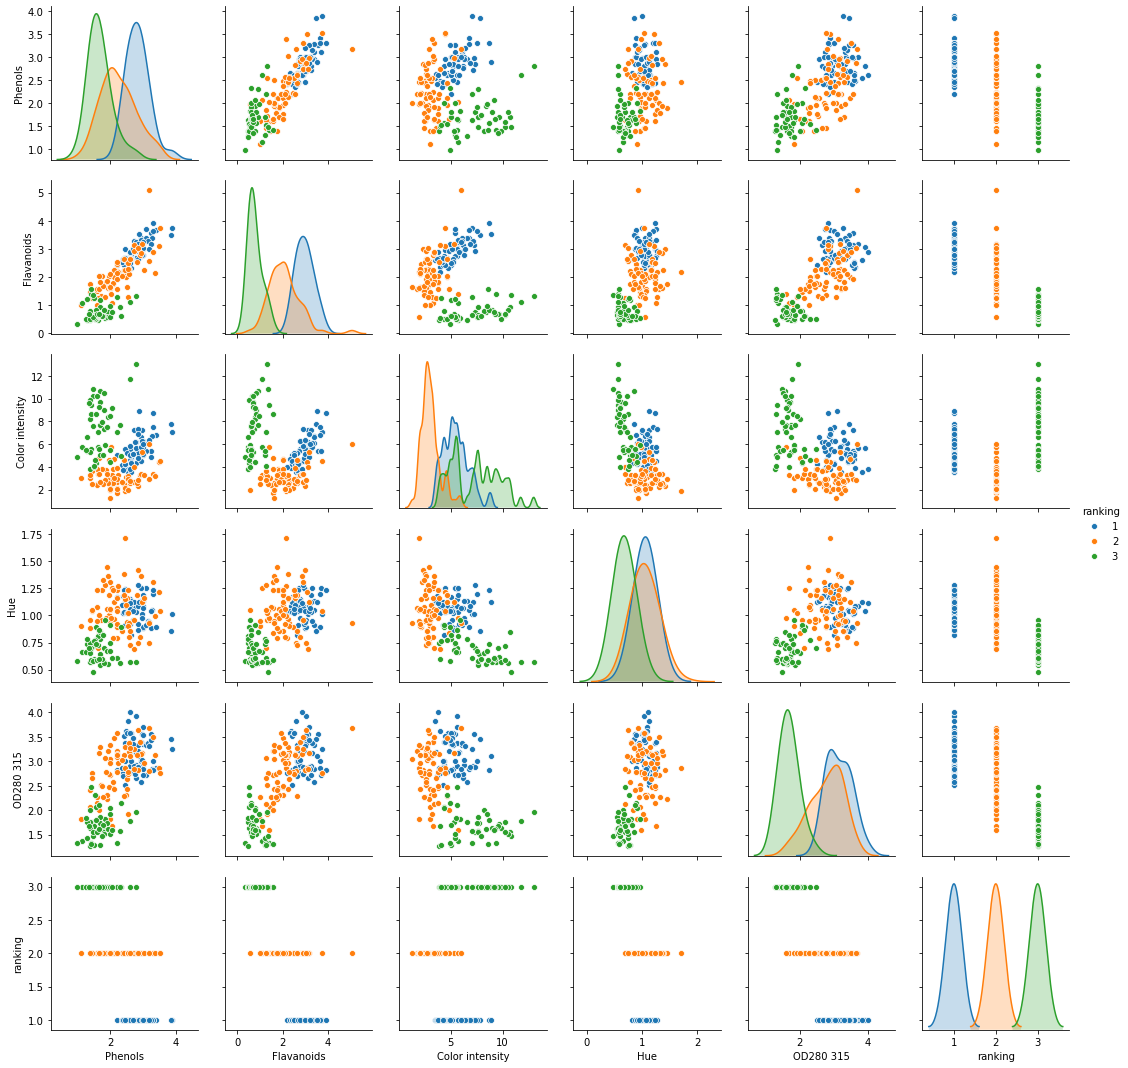

In [11]:
sns.pairplot(df3.iloc[:,[5,6,9,10,11,-1]],hue="ranking",diag_kws={'bw': 0.2})

## Correlation Matrix
The **correlation coefficient** between two random variables $\mathrm{a}$ and $\mathrm{b}$ are defined as:
$$\frac{\mathrm{Cov}(\mathrm{a},\mathrm{b})}{\sqrt{\mathrm{Var}(\mathrm{a})\mathrm{Var}(\mathrm{b})}}.$$
The correlation coefficients are in the range of $[-1,1]$. The positive values represent positive correlations and the negative values represent negative correlations. Basically, it is the "normalized" variance that captures the linear relationship of the two random variables. Therefore, if $\mathrm{x}$ and $\mathrm{y}$ have relationship $\mathrm{y}=\mathrm{x}$, then the correlation coefficient is 1, and if $\mathrm{y}=-\mathrm{x}$, then the correlation coefficient is -1.

<br>
The correlation matrix $\boldsymbol{R}\in\mathbb{R}^{D\times D}$ of a random vector $\boldsymbol{x}$ is a square matrix whose each element $R_{ij}$
denotes the correlation between the attributes $\mathrm{x_i}$
and $\mathrm{x_j}$
. If we regard data points as the i.i.d. samples of $\boldsymbol{x}$
, then we can have an estimate $\hat{\boldsymbol{R}}$
whose each element
$$\hat{R}_{i,j}=\frac{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})}{\sqrt{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})^{2}}\sqrt{\Sigma_{s=1}^{N}(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})^{2}}}=\frac{\hat{\sigma}_{\mathrm{x}_{i},\mathrm{x}_{j}}}{\hat{\sigma}_{\mathrm{x}_{i}}\hat{\sigma}_{\mathrm{x}_{j}}}$$
is an estimate of the correlation (usually called the **Pearson's R**) between attribute $\mathrm{x_i}$
and $\mathrm{x_j}$
. Note that if we **z-normalize** each data point such that
$$z_{i}^{(s)}=\frac{x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}}}{\hat{\sigma}_{\mathrm{x}_{i}}}$$
for all $i$. Then we simply have $\hat{\boldsymbol{R}}=\frac{1}{N}\boldsymbol{Z}^\top \boldsymbol{Z}$, where $\boldsymbol{Z}$ is the design matrix of the normalized data points.

In [12]:
X=df3.drop(["Start assignment",'ranking'],axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Z=sc.fit_transform(X)

In [13]:
P=Z.T.dot(Z)/X.shape[0]
P

array([[ 1.        ,  0.09439694,  0.2115446 , -0.31023514,  0.27079823,
         0.28910112,  0.23681493, -0.15592947,  0.13669791,  0.5463642 ,
        -0.0717472 ,  0.07234319,  0.64372004],
       [ 0.09439694,  1.        ,  0.16404547,  0.2885004 , -0.0545751 ,
        -0.335167  , -0.41100659,  0.29297713, -0.22074619,  0.24898534,
        -0.56129569, -0.36871043, -0.19201056],
       [ 0.2115446 ,  0.16404547,  1.        ,  0.44336719,  0.28658669,
         0.12897954,  0.11507728,  0.18623045,  0.00965194,  0.25888726,
        -0.07466689,  0.00391123,  0.22362626],
       [-0.31023514,  0.2885004 ,  0.44336719,  1.        , -0.08333309,
        -0.32111332, -0.35136986,  0.36192172, -0.19732684,  0.01873198,
        -0.27395522, -0.27676855, -0.44059693],
       [ 0.27079823, -0.0545751 ,  0.28658669, -0.08333309,  1.        ,
         0.21440123,  0.19578377, -0.25629405,  0.23644061,  0.19995001,
         0.0553982 ,  0.06600394,  0.39335085],
       [ 0.28910112, -0.335167

We can use a heatmap to visualize the correlation: [sns heatmap documentation](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

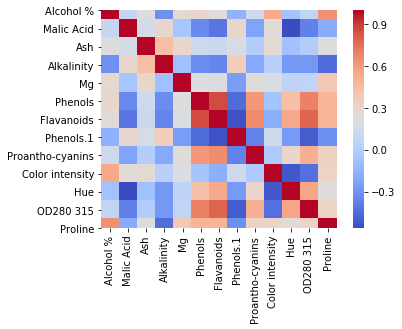

In [14]:
hm=sns.heatmap(P,cbar=True,cmap='coolwarm',square=True,yticklabels=X.columns, xticklabels=X.columns)

NOTE: we could have simply used the NumPy function

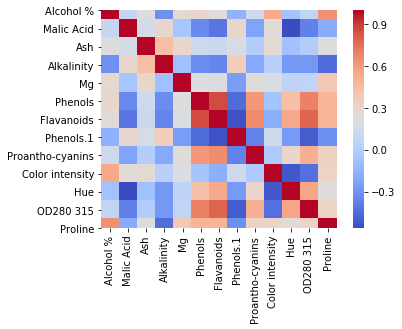

In [16]:
P = np.corrcoef(X.values.T)
hm=sns.heatmap(P,cbar=True,cmap='coolwarm',square=True,yticklabels=X.columns, xticklabels=X.columns)

to get the estimate $\hat{\boldsymbol{P}}$
of the correlation matrix. 

In [17]:
x=np.random.random(1000)*10
#add gaussian distributed noise
y=x+np.random.normal(0,3,1000)

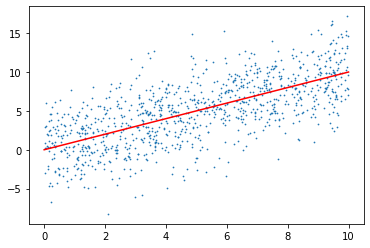

In [18]:
plt.figure()
plt.scatter(x,y,s=0.5)
plt.plot([0,10],[0,10],'r')

In [19]:
np.corrcoef(x,y)

array([[1.        , 0.68228364],
       [0.68228364, 1.        ]])

# Hierarchical agglomerative clustering

## Dataset
We will work with the Iris dataset as our toy example, and for simplicity and visualization we just keep 2-dimensional features, i.e. sepal length and petal width. We want our features to be normalized to range [0,1]. The classification of the dataset looks like this:

In [20]:
import numpy as np
import pandas as pd
df = pd.read_csv("../../Datasets/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Rescale all features to a number in range(0,1]

In [21]:
df["sepal_length"] /= df["sepal_length"].max()
df["sepal_width"] /= df["sepal_width"].max()
df["petal_length"] /= df["petal_length"].max()
df["petal_width"] /= df["petal_width"].max()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


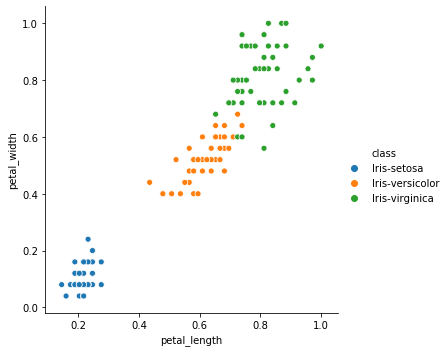

In [22]:
sns.relplot(data=df, x="petal_length", y="petal_width", hue="class")

## Dendrograms and cutting dendrograms to form clusters
Hierarchical clustering can be either bottom-up (agglomerative) or top-down (divisive), but the former one is used much more frequently in real-world applications. The nice property of hierarchical clustering is that it creates a information-rich dendrogram for understanding the relative distance of any two data points in the group.

Here I show how we can accomplish hierarchical clustering with scipy package.

Text(0, 0.5, 'Euclidean distance')

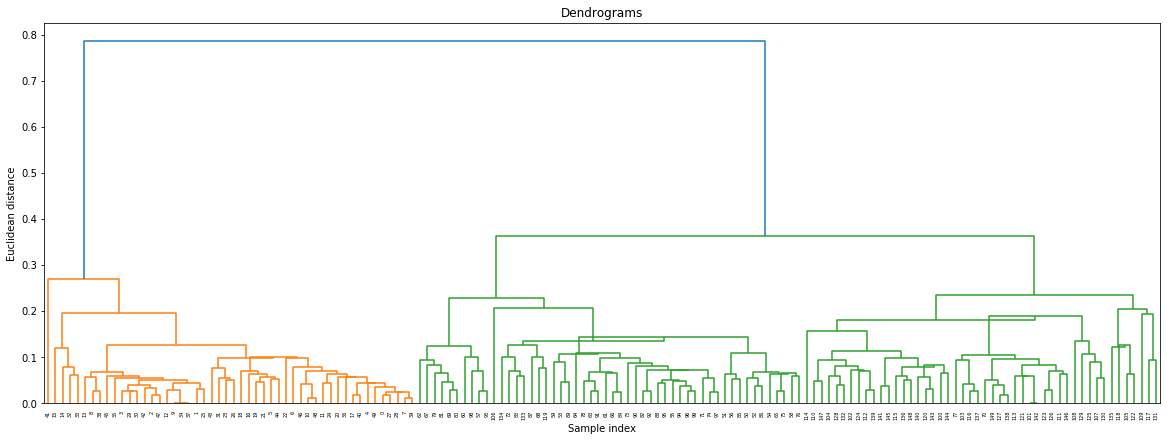

In [24]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

Z=sc.linkage(df.drop('class',axis=1).values,method='centroid')
# Create dendrogram
sc.dendrogram(Z)

plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

Show the trucated dendrogram

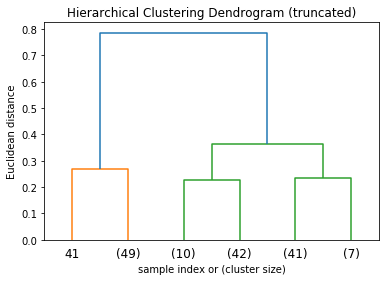

In [26]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('Euclidean distance')
sc.dendrogram(Z,truncate_mode='lastp',p=6,show_leaf_counts=True)
plt.show()

Now we are ready to cut the denrogram and form clusters.<br>
Use distance as criterion:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


Text(0.5, 0.98, 'HAC distance cut')

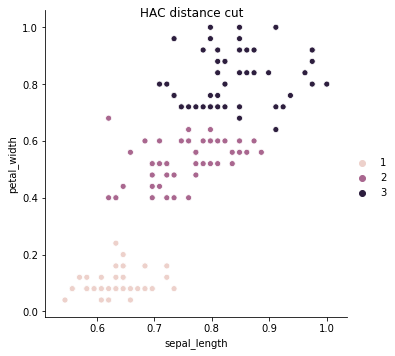

In [27]:
max_d=0.3
clusters = sc.fcluster(Z,max_d,criterion='distance')
print(clusters)
ax=sns.relplot(data=df, x="sepal_length", y="petal_width", hue=clusters, legend='full')
ax.fig.suptitle("HAC distance cut")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 3 4 4 3 4 3 4 4 4 4 3 4 3 5 4 4 4
 4 4 4 5 4 3 3 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 5 5 5 5 5 6 4 5 5 6 5
 5 5 5 5 5 5 6 6 4 5 5 6 5 5 5 5 5 5 5 5 6 5 4 4 6 5 5 5 5 5 5 5 5 5 5 5 5
 5 5]


Text(0.5, 0.98, 'HAC ncluster=3')

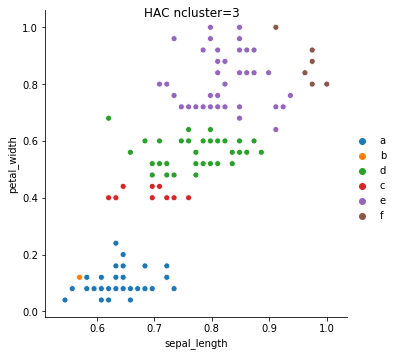

In [31]:
k=6
clusters = sc.fcluster(Z,k,criterion='maxclust')
print(clusters)
hues = [chr(c+96) for c in clusters]
ax2=sns.relplot(data=df, x="sepal_length", y="petal_width", hue=hues, legend='full')
ax2.fig.suptitle("HAC ncluster=3")

Documentation on `scipy.cluster.hierarchy.linkage`: [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
<br><br>
## Fitting an agglomerative clustering model

Text(0.5, 0.98, 'Agglomerative clustering')

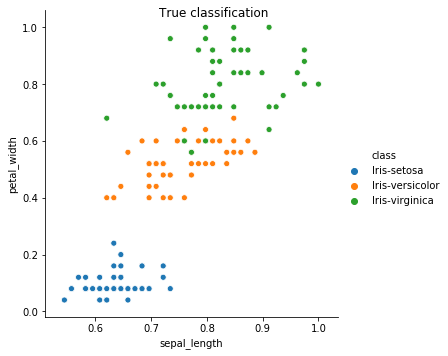

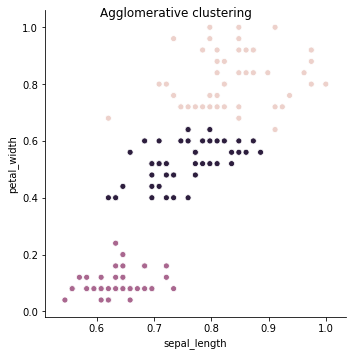

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(df.drop('class',axis=1).values)
labels= cluster.labels_

ax1=sns.relplot(data=df, x="sepal_length", y="petal_width", hue="class")
ax1.fig.suptitle("True classification")

ax2=sns.relplot(data=df, x="sepal_length", y="petal_width", hue=labels, legend=False)
ax2.fig.suptitle("Agglomerative clustering")

# Comparing different unsupervised clustering methods on toy datasets

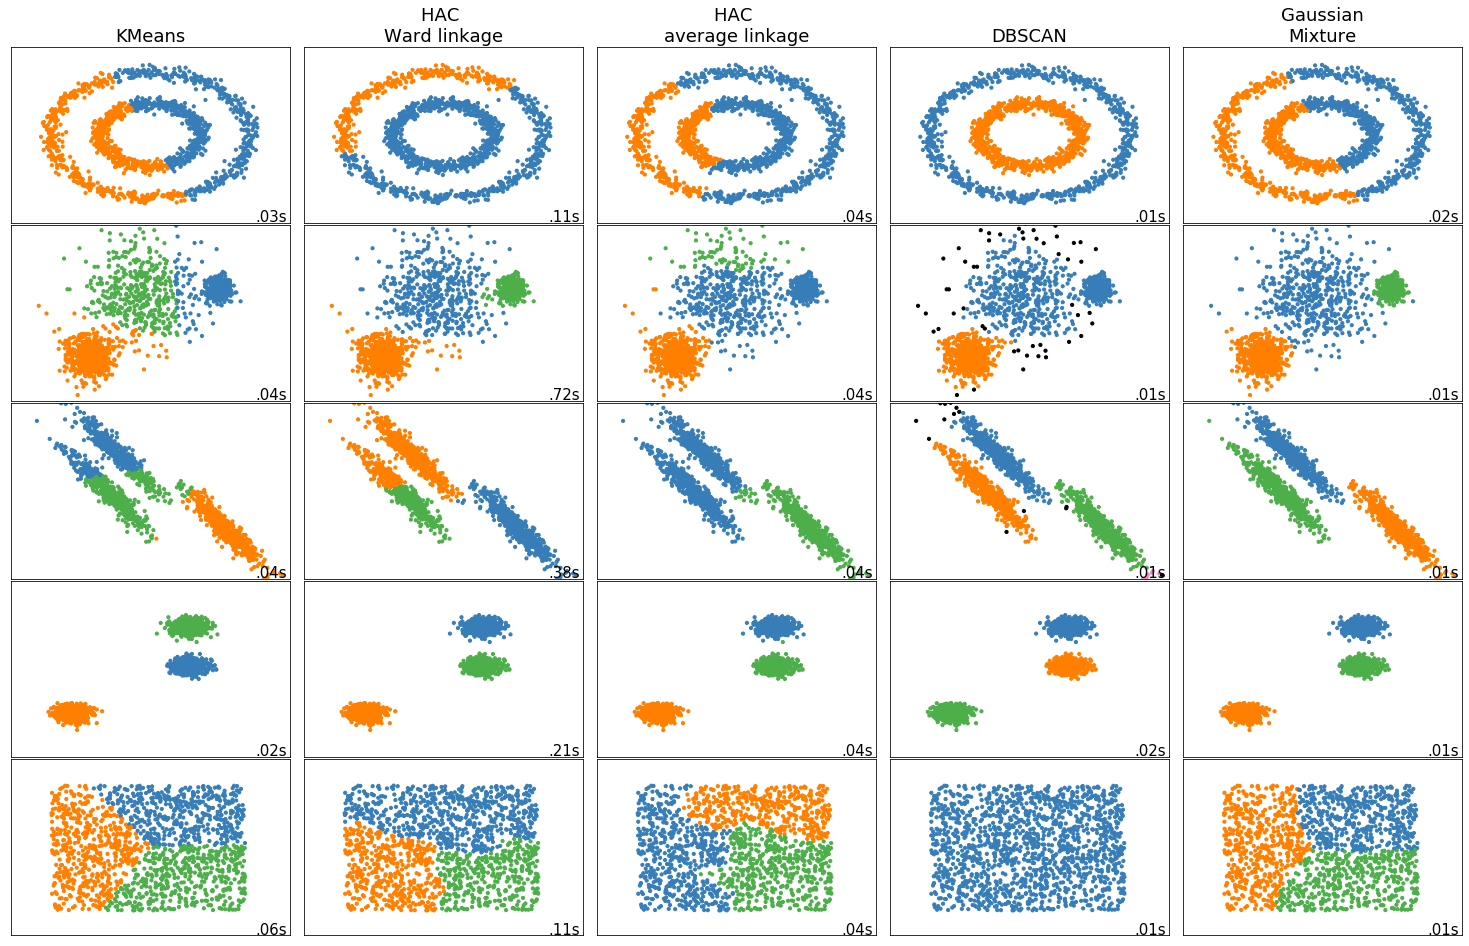

In [34]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 5,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "xi": 0.25,
        },
    ),

    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.KMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )

    dbscan = cluster.DBSCAN(eps=params["eps"],min_samples=params["min_samples"])

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
#         connectivity=connectivity,
    )

    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("KMeans", two_means),
        ("HAC \nWard linkage", ward),
        ("HAC \naverage linkage", average_linkage),
        ("DBSCAN", dbscan),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()